# Part3. Predictive-Modeling
ref : https://www.kaggle.com/ash316/eda-to-prediction-dietanic

In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('fivethirtyeight')

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 5GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/tatanic-train-preprocessed/train_preprocessed.csv
/kaggle/input/titanic/train.csv
/kaggle/input/titanic/gender_submission.csv
/kaggle/input/titanic/test.csv


In [2]:
from sklearn.model_selection import train_test_split

from sklearn import svm
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier

from sklearn import metrics

## Load & Split preprocessed dataset

In [3]:
data = pd.read_csv('/kaggle/input/tatanic-train-preprocessed/train_preprocessed.csv')
data.head(2)

,Survived,Pclass,Age,SibSp,Parch,Fare,Age_band,Family_size,Alone,Fare_range,Sex_male,Initial_Master,Initial_Miss,Initial_Mr,Initial_Mrs,Port_C,Port_Q
0,0,3,22.0,1,0,7.2500,1,1,0,0,1,0,0,1,0,0,0
1,1,1,38.0,1,0,71.2833,2,1,0,3,0,0,0,0,1,1,0


In [4]:
X_train, X_val, y_train, y_val = train_test_split(data.iloc[:, 1:], data['Survived'],
                                                    stratify=data['Survived'],
                                                    test_size=0.3, random_state=0)

# Check the balance of labels
display(y_train.value_counts(normalize=True))
display(y_val.value_counts(normalize=True))
display(X_train.head(2))

0    0.616372
1    0.383628
Name: Survived, dtype: float64

0    0.615672
1    0.384328
Name: Survived, dtype: float64

,Pclass,Age,SibSp,Parch,Fare,Age_band,Family_size,Alone,Fare_range,Sex_male,Initial_Master,Initial_Miss,Initial_Mr,Initial_Mrs,Port_C,Port_Q
231,3,29.0,0,0,7.7750,1,0,1,0,1,0,0,1,0,0,0
836,3,21.0,0,0,8.6625,1,0,1,1,1,0,0,1,0,0,0


## model 1. Radial Support Vector Machines(rbf-SVM)

In [5]:
svm_clf = svm.SVC(C=1.0, kernel='rbf', gamma=0.1)
svm_clf.fit(X_train, y_train)

prediction = svm_clf.predict(X_val)
score = metrics.accuracy_score(y_val, prediction)

print('accuracy of rbf-SVM:', score)

accuracy of rbf-SVM: 0.7388059701492538


## model 2. Linear Support Vector Machine(linear-SVM)

In [6]:
svm_clf = svm.SVC(C=0.1, kernel='linear', gamma=0.1)
svm_clf.fit(X_train, y_train)

prediction = svm_clf.predict(X_val)
score = metrics.accuracy_score(y_val, prediction)

print('accuracy of linear-SVM:', score)

accuracy of linear-SVM: 0.8208955223880597


## model 3. Logistic Regression

In [7]:
logistic_clf = LogisticRegression(max_iter=1000)
logistic_clf.fit(X_train, y_train)

prediction = logistic_clf.predict(X_val)
score = metrics.accuracy_score(y_val, prediction)

print('accuracy of logistic regression:', score)

accuracy of logistic regression: 0.8432835820895522


## model 4. Decision Tree

In [8]:
dt_clf = DecisionTreeClassifier()
dt_clf.fit(X_train, y_train)

prediction = dt_clf.predict(X_val)
score = metrics.accuracy_score(y_val, prediction)

print('accuracy of Decision Tree:', score)

accuracy of Decision Tree: 0.7686567164179104


## model 5. K-Nearest Neighbors(KNN)

In [9]:
knn_clf = KNeighborsClassifier()
knn_clf.fit(X_train, y_train)

prediction = knn_clf.predict(X_val)
score = metrics.accuracy_score(y_val, prediction)

print('accuracy of KNN:', score)

accuracy of KNN: 0.7350746268656716


The accuracy of KNN model changes as the **n_neighbors** parameter changes. The default value of n_neighbors is 5. We can compare the accuracy of KNN models with different n_neighbors parameters.

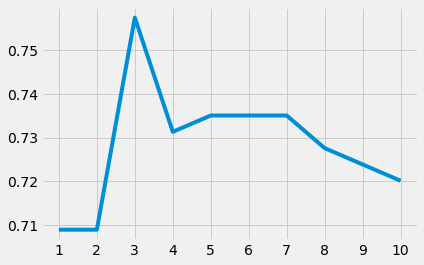

>>> Accuracy list: [0.7089552238805971, 0.7089552238805971, 0.7574626865671642, 0.7313432835820896, 0.7350746268656716, 0.7350746268656716, 0.7350746268656716, 0.7276119402985075, 0.7238805970149254, 0.7201492537313433]
>>> Maximum accuracy: 0.7574626865671642


In [10]:
acc_list = []
for tmp_param in range(1, 11):
    tmp_knn_clf = KNeighborsClassifier(n_neighbors = tmp_param)
    tmp_knn_clf.fit(X_train, y_train)
    tmp_acc = metrics.accuracy_score(y_val, tmp_knn_clf.predict(X_val))
    
    acc_list.append(tmp_acc)

plt.plot(range(1,11), acc_list)
plt.xticks(range(1,11))
plt.show()

print(f'>>> Accuracy list: {acc_list}')
print(f'>>> Maximum accuracy: {max(acc_list)}')

## model 6. Gaussian Naive Bayes

In [11]:
nb_clf = GaussianNB()
nb_clf.fit(X_train, y_train)

prediction = nb_clf.predict(X_val)
score = metrics.accuracy_score(y_val, prediction)

print('accuracy of Naive Bayes:', score)

accuracy of Naive Bayes: 0.8171641791044776


## model 7. Random Forest

In [12]:
rf_clf = RandomForestClassifier(n_estimators=100)
rf_clf.fit(X_train, y_train)

prediction = rf_clf.predict(X_val)
score = metrics.accuracy_score(y_val, prediction)

print('accuracy of Random Forest:', score)

accuracy of Random Forest: 0.8059701492537313


The validation accuracy of models is not the only metric to decide best model. The robustness is also important. The accuracy of a model changes as new data is input. This is known as **model variance**.<br><br>
To overcome this and get a generalized(robust) model, we use **Cross Validation**, more specifically **K-fold Cross Validation**.

## Cross Validation

In [13]:
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_val_predict
from sklearn.model_selection import cross_val_score

In [14]:
kfold = StratifiedKFold(n_splits=10, random_state=22, shuffle=True)
model_names = ['rbf-SVM', 'linear-SVM', 'logistic regression', 'Decision Tree', 'KNN', 'Naive Bayes', 'Random Forest']
models = [svm.SVC(C=1.0, kernel='rbf', gamma=0.1), svm.SVC(C=0.1, kernel='linear', gamma=0.1), LogisticRegression(max_iter=1000), 
          DecisionTreeClassifier(), KNeighborsClassifier(n_neighbors=3), GaussianNB(), RandomForestClassifier(n_estimators=100)]

acc_list = []
acc_mean_list = []
acc_std_list = []

for tmp_model in models:
    cv_result = cross_val_score(tmp_model, data.iloc[:, 1:], data['Survived'],
                                cv=kfold, scoring='accuracy')
    acc_list.append(cv_result)
    acc_mean_list.append(cv_result.mean())
    acc_std_list.append(cv_result.std())

pd.DataFrame({'CV_mean':acc_mean_list, 'CV_std':acc_std_list}, index=model_names).sort_values('CV_mean')

,CV_mean,CV_std
KNN,0.738402,0.045325
rbf-SVM,0.746292,0.037312
Decision Tree,0.781174,0.036118
Naive Bayes,0.809238,0.039360
Random Forest,0.810375,0.025876
linear-SVM,0.824969,0.032660
logistic regression,0.826055,0.034442


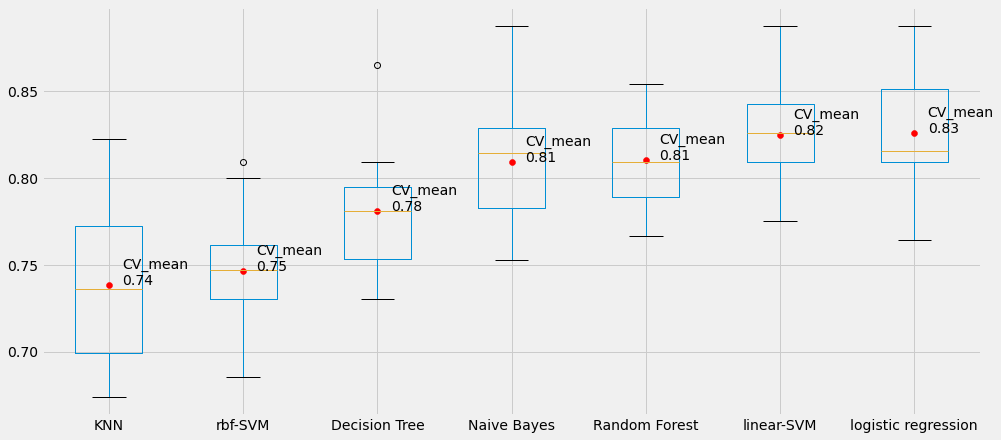

In [15]:
plt.figure(figsize=(15, 7))

# Draw boxplot of each model
tmp_df = pd.concat([pd.DataFrame(acc_list, index=model_names), 
                    pd.DataFrame({'CV_mean':acc_mean_list}, index=model_names)],
                   axis=1)
tmp_df.sort_values('CV_mean').drop(columns='CV_mean').T.boxplot()

# Annotate CV_mean on each boxplot
acc_mean_sorted = sorted(acc_mean_list)
plt.scatter(range(1,8), acc_mean_sorted, color='red')
for tmp_x, tmp_y in zip(np.arange(1,8), acc_mean_sorted):
    plt.text(tmp_x+0.1, tmp_y, s=f'CV_mean\n{tmp_y:.2f}')

plt.show()

- Top-4 models in regard to accuracy are **Random Forest, Naive Bayes, linear-SVM, logistic regression**. Random Forest seems most robust among them.
- However, only using classification accuracy is sometimes misleading due to data imbalance. We can get a better version of summarized result with the help of **confusion matrix**, which shows how many mistakes the model made in each case.

## Confusion Matrix

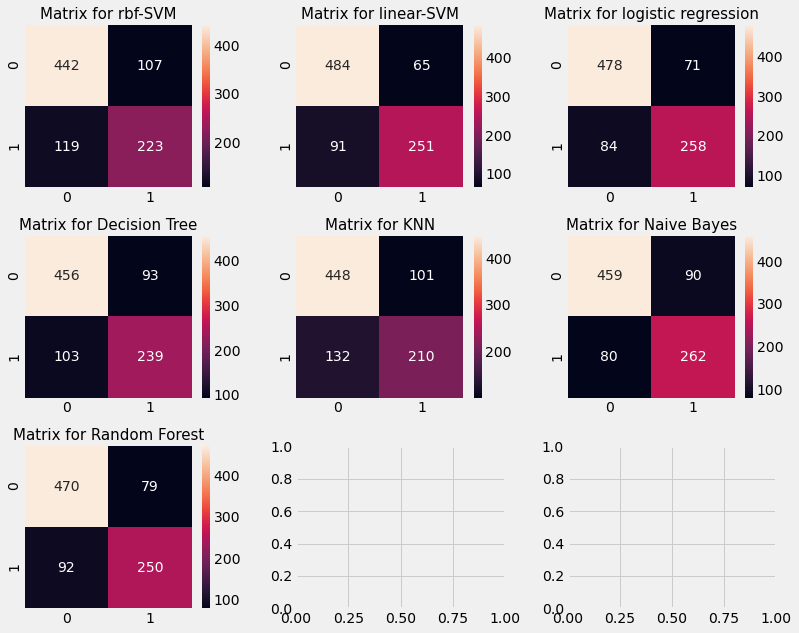

In [16]:
fig, ax = plt.subplots(3, 3, figsize=(12, 10))

for tmp_ax, tmp_model, tmp_name in zip(ax.ravel(), models, model_names):
    y_pred = cross_val_predict(tmp_model, data.iloc[:, 1:], data['Survived'], cv=kfold)
    sns.heatmap(metrics.confusion_matrix(data['Survived'], y_pred),
                ax=tmp_ax, annot=True, fmt='2.0f')
    tmp_ax.set_title(f'Matrix for {tmp_name}', size=15)

plt.subplots_adjust(hspace=0.3,wspace=0.3)
plt.show()

- The left diagonal of confusion matrix shows the number of correct predictions while the right one shows wrong predictions.
- Looking all the matrices, **linear-SVM** is good at predicting deceased passengers and **Naive Bayes** is good at predicting survived passengers.